# Set up notebook

## Import libraries

In [37]:
import pandas as pd 
import numpy as np
import scipy
from sklearn import decomposition, manifold, preprocessing, cluster

import matplotlib.pyplot as plt
import seaborn as sns

from selenium import webdriver
from bs4 import BeautifulSoup
import requests

from ipywidgets import interact

%matplotlib inline

## Plot style

In [3]:
plt.style.use("fivethirtyeight")

In [107]:
pd.set_option('max_colwidth',500)

# Load data

In [108]:
df = pd.read_csv("https://raw.githubusercontent.com/socathie/paperplane/master/data/most_backed.csv").iloc[:,1:]

# Exploratory data analysis

## What does the data look like

In [109]:
df.head()

,amt.pledged,blurb,category,currency,goal,location,num.backers,num.backers.tier,pledge.tier,title,url
0,8782571.0,\nThis is a card game for people who are into kittens and explosions and laser beams and sometimes goats.\n,Tabletop Games,usd,10000.0,"Los Angeles, CA",219382,"[15505, 202934, 200, 5]","[20.0, 35.0, 100.0, 500.0]",Exploding Kittens,/projects/elanlee/exploding-kittens
1,6465690.0,"\nAn unusually addicting, high-quality desk toy designed to help you focus. Fidget at work, in class, and at home in style.\n",Product Design,usd,15000.0,"Denver, CO",154926,"[788, 250, 43073, 21796, 41727, 21627, 12215, 7608, 3290, 2189, 82, 85]","[1.0, 14.0, 19.0, 19.0, 35.0, 35.0, 79.0, 79.0, 129.0, 129.0, 849.0, 849.0]",Fidget Cube: A Vinyl Desk Toy,/projects/antsylabs/fidget-cube-a-vinyl-desk-toy
2,5408916.0,\nBring Reading Rainbow’s library of interactive books & video field trips to more platforms & provide free access to classrooms in need!\n,Web,usd,1000000.0,"Los Angeles, CA",105857,"[19639, 14343, 9136, 2259, 5666, 24512, 4957, 4359, 749, 1248, 500, 339, 282, 417, 1548, 517, 749, 155, 160, 60, 5, 10, 3, 100, 75, 12, 295, 69, 156, 1, 33, 1, 1, 8, 6, 30, 13, 39, 1, 4, 6, 21, 9, 3, 23, 11, 12, 20, 14, 11, 4, 14, 36, 10, 1, 1, 10, 2, 2, 8, 13, 10, 1, 1]","[5.0, 10.0, 25.0, 30.0, 35.0, 50.0, 75.0, 100.0, 110.0, 125.0, 140.0, 145.0, 150.0, 175.0, 200.0, 200.0, 250.0, 250.0, 275.0, 300.0, 300.0, 300.0, 300.0, 350.0, 350.0, 350.0, 375.0, 375.0, 400.0, 400.0, 400.0, 450.0, 500.0, 500.0, 500.0, 600.0, 700.0, 750.0, 750.0, 750.0, 750.0, 750.0, 750.0, 800.0, 800.0, 800.0, 800.0, 800.0, 800.0, 900.0, 1200.0, 1500.0, 1700.0, 2500.0, 2600.0, 3000.0, 3500.0, 3500.0, 3500.0, 3750.0, 5000.0, 10000.0, 10000.0, 10000.0]","Bring Reading Rainbow Back for Every Child, Everywhere!",/projects/readingrainbow/bring-reading-rainbow-back-for-every-child-everywh
3,5702153.0,\nUPDATED: This is it. We're making a Veronica Mars movie! Now the only question is: how big can we make it? We need your help!\n,Narrative Film,usd,2000000.0,"San Diego, CA",91585,"[5938, 8423, 11509, 22997, 23227, 1865, 7260, 152, 150, 1478, 3048, 100, 891, 91, 100, 135, 40, 100, 50, 150, 150, 50, 100, 100, 100, 20, 30, 10, 4, 3, 3, 1]","[1.0, 10.0, 25.0, 35.0, 50.0, 75.0, 100.0, 150.0, 150.0, 175.0, 200.0, 250.0, 275.0, 350.0, 400.0, 400.0, 450.0, 500.0, 600.0, 750.0, 750.0, 750.0, 1000.0, 1000.0, 1000.0, 2500.0, 3000.0, 3500.0, 5000.0, 6500.0, 8000.0, 10000.0]",The Veronica Mars Movie Project,/projects/559914737/the-veronica-mars-movie-project
4,3336371.0,"\nAn adventure game from Tim Schafer, Double Fine, and YOU!\n",Video Games,usd,400000.0,"San Francisco, CA",87142,"[47946, 24636, 1090, 11530, 900, 148, 100, 10, 4]","[15.0, 30.0, 60.0, 100.0, 250.0, 500.0, 1000.0, 5000.0, 10000.0]",Double Fine Adventure,/projects/doublefine/double-fine-adventure


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
amt.pledged         4000 non-null float64
blurb               4000 non-null object
category            4000 non-null object
currency            4000 non-null object
goal                4000 non-null float64
location            4000 non-null object
num.backers         4000 non-null int64
num.backers.tier    4000 non-null object
pledge.tier         4000 non-null object
title               4000 non-null object
url                 4000 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 343.8+ KB


In [16]:
df.describe()

,amt.pledged,goal,num.backers
count,4.000000e+03,4.000000e+03,4000.000000
mean,2.898410e+05,6.171059e+04,3582.659750
std,7.119734e+05,1.266611e+05,7316.163105
min,1.925000e+03,1.000000e+00,1109.000000
25%,6.755950e+04,1.300000e+04,1406.000000
50%,1.203770e+05,3.000000e+04,1946.000000
75%,2.591978e+05,6.000000e+04,3372.000000
max,2.033899e+07,2.000000e+06,219382.000000


In [17]:
df.describe(include=["O"])

,blurb,category,currency,location,num.backers.tier,pledge.tier,title,url
count,4000,4000,4000,4000,4000,4000,4000,4000
unique,3980,115,9,808,3998,3978,3995,3998
top,\n,Product Design,usd,"San Francisco, CA","[83, 669, 413, 60]","[90.0, 100.0]",Werewolf,/projects/1609568567/code-hardcore-the-coolest...
freq,9,769,3437,280,2,4,2,2


# Data mining

In [191]:
df2 = df.copy()

## Getting creator info

In [192]:
df2["creator"] = df2["url"].map(lambda x: x.split("/")[2])

In [193]:
df2.head()

,amt.pledged,blurb,category,currency,goal,location,num.backers,num.backers.tier,pledge.tier,title,url,creator
0,8782571.0,\nThis is a card game for people who are into kittens and explosions and laser beams and sometimes goats.\n,Tabletop Games,usd,10000.0,"Los Angeles, CA",219382,"[15505, 202934, 200, 5]","[20.0, 35.0, 100.0, 500.0]",Exploding Kittens,/projects/elanlee/exploding-kittens,elanlee
1,6465690.0,"\nAn unusually addicting, high-quality desk toy designed to help you focus. Fidget at work, in class, and at home in style.\n",Product Design,usd,15000.0,"Denver, CO",154926,"[788, 250, 43073, 21796, 41727, 21627, 12215, 7608, 3290, 2189, 82, 85]","[1.0, 14.0, 19.0, 19.0, 35.0, 35.0, 79.0, 79.0, 129.0, 129.0, 849.0, 849.0]",Fidget Cube: A Vinyl Desk Toy,/projects/antsylabs/fidget-cube-a-vinyl-desk-toy,antsylabs
2,5408916.0,\nBring Reading Rainbow’s library of interactive books & video field trips to more platforms & provide free access to classrooms in need!\n,Web,usd,1000000.0,"Los Angeles, CA",105857,"[19639, 14343, 9136, 2259, 5666, 24512, 4957, 4359, 749, 1248, 500, 339, 282, 417, 1548, 517, 749, 155, 160, 60, 5, 10, 3, 100, 75, 12, 295, 69, 156, 1, 33, 1, 1, 8, 6, 30, 13, 39, 1, 4, 6, 21, 9, 3, 23, 11, 12, 20, 14, 11, 4, 14, 36, 10, 1, 1, 10, 2, 2, 8, 13, 10, 1, 1]","[5.0, 10.0, 25.0, 30.0, 35.0, 50.0, 75.0, 100.0, 110.0, 125.0, 140.0, 145.0, 150.0, 175.0, 200.0, 200.0, 250.0, 250.0, 275.0, 300.0, 300.0, 300.0, 300.0, 350.0, 350.0, 350.0, 375.0, 375.0, 400.0, 400.0, 400.0, 450.0, 500.0, 500.0, 500.0, 600.0, 700.0, 750.0, 750.0, 750.0, 750.0, 750.0, 750.0, 800.0, 800.0, 800.0, 800.0, 800.0, 800.0, 900.0, 1200.0, 1500.0, 1700.0, 2500.0, 2600.0, 3000.0, 3500.0, 3500.0, 3500.0, 3750.0, 5000.0, 10000.0, 10000.0, 10000.0]","Bring Reading Rainbow Back for Every Child, Everywhere!",/projects/readingrainbow/bring-reading-rainbow-back-for-every-child-everywh,readingrainbow
3,5702153.0,\nUPDATED: This is it. We're making a Veronica Mars movie! Now the only question is: how big can we make it? We need your help!\n,Narrative Film,usd,2000000.0,"San Diego, CA",91585,"[5938, 8423, 11509, 22997, 23227, 1865, 7260, 152, 150, 1478, 3048, 100, 891, 91, 100, 135, 40, 100, 50, 150, 150, 50, 100, 100, 100, 20, 30, 10, 4, 3, 3, 1]","[1.0, 10.0, 25.0, 35.0, 50.0, 75.0, 100.0, 150.0, 150.0, 175.0, 200.0, 250.0, 275.0, 350.0, 400.0, 400.0, 450.0, 500.0, 600.0, 750.0, 750.0, 750.0, 1000.0, 1000.0, 1000.0, 2500.0, 3000.0, 3500.0, 5000.0, 6500.0, 8000.0, 10000.0]",The Veronica Mars Movie Project,/projects/559914737/the-veronica-mars-movie-project,559914737
4,3336371.0,"\nAn adventure game from Tim Schafer, Double Fine, and YOU!\n",Video Games,usd,400000.0,"San Francisco, CA",87142,"[47946, 24636, 1090, 11530, 900, 148, 100, 10, 4]","[15.0, 30.0, 60.0, 100.0, 250.0, 500.0, 1000.0, 5000.0, 10000.0]",Double Fine Adventure,/projects/doublefine/double-fine-adventure,doublefine


### Some of the creators are just numbers

Scrape Kickstarter profile pages to get their names

## Location

In [194]:
df2["loc1"] = df2["location"].map(lambda x: x.split(", ")[0].strip())
df2["loc2"] = df2["location"].map(lambda x: x.split(", ")[1].strip())

In [195]:
df2.head()

,amt.pledged,blurb,category,currency,goal,location,num.backers,num.backers.tier,pledge.tier,title,url,creator,loc1,loc2
0,8782571.0,\nThis is a card game for people who are into kittens and explosions and laser beams and sometimes goats.\n,Tabletop Games,usd,10000.0,"Los Angeles, CA",219382,"[15505, 202934, 200, 5]","[20.0, 35.0, 100.0, 500.0]",Exploding Kittens,/projects/elanlee/exploding-kittens,elanlee,Los Angeles,CA
1,6465690.0,"\nAn unusually addicting, high-quality desk toy designed to help you focus. Fidget at work, in class, and at home in style.\n",Product Design,usd,15000.0,"Denver, CO",154926,"[788, 250, 43073, 21796, 41727, 21627, 12215, 7608, 3290, 2189, 82, 85]","[1.0, 14.0, 19.0, 19.0, 35.0, 35.0, 79.0, 79.0, 129.0, 129.0, 849.0, 849.0]",Fidget Cube: A Vinyl Desk Toy,/projects/antsylabs/fidget-cube-a-vinyl-desk-toy,antsylabs,Denver,CO
2,5408916.0,\nBring Reading Rainbow’s library of interactive books & video field trips to more platforms & provide free access to classrooms in need!\n,Web,usd,1000000.0,"Los Angeles, CA",105857,"[19639, 14343, 9136, 2259, 5666, 24512, 4957, 4359, 749, 1248, 500, 339, 282, 417, 1548, 517, 749, 155, 160, 60, 5, 10, 3, 100, 75, 12, 295, 69, 156, 1, 33, 1, 1, 8, 6, 30, 13, 39, 1, 4, 6, 21, 9, 3, 23, 11, 12, 20, 14, 11, 4, 14, 36, 10, 1, 1, 10, 2, 2, 8, 13, 10, 1, 1]","[5.0, 10.0, 25.0, 30.0, 35.0, 50.0, 75.0, 100.0, 110.0, 125.0, 140.0, 145.0, 150.0, 175.0, 200.0, 200.0, 250.0, 250.0, 275.0, 300.0, 300.0, 300.0, 300.0, 350.0, 350.0, 350.0, 375.0, 375.0, 400.0, 400.0, 400.0, 450.0, 500.0, 500.0, 500.0, 600.0, 700.0, 750.0, 750.0, 750.0, 750.0, 750.0, 750.0, 800.0, 800.0, 800.0, 800.0, 800.0, 800.0, 900.0, 1200.0, 1500.0, 1700.0, 2500.0, 2600.0, 3000.0, 3500.0, 3500.0, 3500.0, 3750.0, 5000.0, 10000.0, 10000.0, 10000.0]","Bring Reading Rainbow Back for Every Child, Everywhere!",/projects/readingrainbow/bring-reading-rainbow-back-for-every-child-everywh,readingrainbow,Los Angeles,CA
3,5702153.0,\nUPDATED: This is it. We're making a Veronica Mars movie! Now the only question is: how big can we make it? We need your help!\n,Narrative Film,usd,2000000.0,"San Diego, CA",91585,"[5938, 8423, 11509, 22997, 23227, 1865, 7260, 152, 150, 1478, 3048, 100, 891, 91, 100, 135, 40, 100, 50, 150, 150, 50, 100, 100, 100, 20, 30, 10, 4, 3, 3, 1]","[1.0, 10.0, 25.0, 35.0, 50.0, 75.0, 100.0, 150.0, 150.0, 175.0, 200.0, 250.0, 275.0, 350.0, 400.0, 400.0, 450.0, 500.0, 600.0, 750.0, 750.0, 750.0, 1000.0, 1000.0, 1000.0, 2500.0, 3000.0, 3500.0, 5000.0, 6500.0, 8000.0, 10000.0]",The Veronica Mars Movie Project,/projects/559914737/the-veronica-mars-movie-project,559914737,San Diego,CA
4,3336371.0,"\nAn adventure game from Tim Schafer, Double Fine, and YOU!\n",Video Games,usd,400000.0,"San Francisco, CA",87142,"[47946, 24636, 1090, 11530, 900, 148, 100, 10, 4]","[15.0, 30.0, 60.0, 100.0, 250.0, 500.0, 1000.0, 5000.0, 10000.0]",Double Fine Adventure,/projects/doublefine/double-fine-adventure,doublefine,San Francisco,CA


In [196]:
df2["is_state"] = df2.loc2.map(lambda x: 1 if len(x) == 2 else 0)

In [197]:
df2["loc2"][df2["is_state"] == 0].unique()

array(['Canada', 'Japan', 'Czech Republic', 'China', 'Norway', 'Belgium',
       'Sweden', 'Germany', 'France', 'Manhattan', 'Poland', 'Slovenia',
       'India', 'Denmark', 'Spain', 'Luxembourg', 'Taiwan', 'Los Angeles',
       'Netherlands', 'Mexico', 'Queens', 'Russia', 'Thailand', 'Israel',
       'Italy', 'Austria', 'South Korea', 'Bulgaria', 'South Africa',
       'Afghanistan', 'Hong Kong', 'Brazil', 'Switzerland', 'Ukraine',
       'Chile', 'Argentina', 'United Arab Emirates', 'Finland', 'Belarus',
       'Turkey', 'Romania', 'Brooklyn', 'Malta', 'Greece', 'Iceland',
       'Slovakia', 'Singapore', 'Nashville', 'Macedonia', 'Philadelphia',
       'San Diego', 'Costa Rica', 'Bakersfield', 'Portland', 'Miami',
       'Philippines', 'Croatia', 'Egypt', 'Ireland', 'Thousand Oaks',
       'Virgin Islands', 'Crested Butte', 'Puerto Rico', 'Indonesia',
       'Cameroon', 'Framingham', 'Hungary', 'Colombia', 'Maplewood',
       'Latvia', 'Kenya'], dtype=object)

In [198]:
in_USA = ["Manhattan", "Brooklyn", "Nashville", "Philadelphia", "San Diego", "Portland", 
          "Miami", "Thousand Oaks", "Virgin Islands", "Crested Butte", "Framingham", "Maplewood"]

In [199]:
df2["loc_USA"] = df2["loc2"].map(lambda x: 1 if len(x) == 2 or x in in_USA else 0)

In [200]:
df2.head()

,amt.pledged,blurb,category,currency,goal,location,num.backers,num.backers.tier,pledge.tier,title,url,creator,loc1,loc2,is_state,loc_USA
0,8782571.0,\nThis is a card game for people who are into kittens and explosions and laser beams and sometimes goats.\n,Tabletop Games,usd,10000.0,"Los Angeles, CA",219382,"[15505, 202934, 200, 5]","[20.0, 35.0, 100.0, 500.0]",Exploding Kittens,/projects/elanlee/exploding-kittens,elanlee,Los Angeles,CA,1,1
1,6465690.0,"\nAn unusually addicting, high-quality desk toy designed to help you focus. Fidget at work, in class, and at home in style.\n",Product Design,usd,15000.0,"Denver, CO",154926,"[788, 250, 43073, 21796, 41727, 21627, 12215, 7608, 3290, 2189, 82, 85]","[1.0, 14.0, 19.0, 19.0, 35.0, 35.0, 79.0, 79.0, 129.0, 129.0, 849.0, 849.0]",Fidget Cube: A Vinyl Desk Toy,/projects/antsylabs/fidget-cube-a-vinyl-desk-toy,antsylabs,Denver,CO,1,1
2,5408916.0,\nBring Reading Rainbow’s library of interactive books & video field trips to more platforms & provide free access to classrooms in need!\n,Web,usd,1000000.0,"Los Angeles, CA",105857,"[19639, 14343, 9136, 2259, 5666, 24512, 4957, 4359, 749, 1248, 500, 339, 282, 417, 1548, 517, 749, 155, 160, 60, 5, 10, 3, 100, 75, 12, 295, 69, 156, 1, 33, 1, 1, 8, 6, 30, 13, 39, 1, 4, 6, 21, 9, 3, 23, 11, 12, 20, 14, 11, 4, 14, 36, 10, 1, 1, 10, 2, 2, 8, 13, 10, 1, 1]","[5.0, 10.0, 25.0, 30.0, 35.0, 50.0, 75.0, 100.0, 110.0, 125.0, 140.0, 145.0, 150.0, 175.0, 200.0, 200.0, 250.0, 250.0, 275.0, 300.0, 300.0, 300.0, 300.0, 350.0, 350.0, 350.0, 375.0, 375.0, 400.0, 400.0, 400.0, 450.0, 500.0, 500.0, 500.0, 600.0, 700.0, 750.0, 750.0, 750.0, 750.0, 750.0, 750.0, 800.0, 800.0, 800.0, 800.0, 800.0, 800.0, 900.0, 1200.0, 1500.0, 1700.0, 2500.0, 2600.0, 3000.0, 3500.0, 3500.0, 3500.0, 3750.0, 5000.0, 10000.0, 10000.0, 10000.0]","Bring Reading Rainbow Back for Every Child, Everywhere!",/projects/readingrainbow/bring-reading-rainbow-back-for-every-child-everywh,readingrainbow,Los Angeles,CA,1,1
3,5702153.0,\nUPDATED: This is it. We're making a Veronica Mars movie! Now the only question is: how big can we make it? We need your help!\n,Narrative Film,usd,2000000.0,"San Diego, CA",91585,"[5938, 8423, 11509, 22997, 23227, 1865, 7260, 152, 150, 1478, 3048, 100, 891, 91, 100, 135, 40, 100, 50, 150, 150, 50, 100, 100, 100, 20, 30, 10, 4, 3, 3, 1]","[1.0, 10.0, 25.0, 35.0, 50.0, 75.0, 100.0, 150.0, 150.0, 175.0, 200.0, 250.0, 275.0, 350.0, 400.0, 400.0, 450.0, 500.0, 600.0, 750.0, 750.0, 750.0, 1000.0, 1000.0, 1000.0, 2500.0, 3000.0, 3500.0, 5000.0, 6500.0, 8000.0, 10000.0]",The Veronica Mars Movie Project,/projects/559914737/the-veronica-mars-movie-project,559914737,San Diego,CA,1,1
4,3336371.0,"\nAn adventure game from Tim Schafer, Double Fine, and YOU!\n",Video Games,usd,400000.0,"San Francisco, CA",87142,"[47946, 24636, 1090, 11530, 900, 148, 100, 10, 4]","[15.0, 30.0, 60.0, 100.0, 250.0, 500.0, 1000.0, 5000.0, 10000.0]",Double Fine Adventure,/projects/doublefine/double-fine-adventure,doublefine,San Francisco,CA,1,1


In [201]:
locations = []
for i in range(df2.shape[0]):
    if df2["loc_USA"][i] == 1:
        locations.append("USA")
    else:
        locations.append(df2["loc2"][i])

In [202]:
df2["country"] = np.array(locations)

In [203]:
df2.head()

,amt.pledged,blurb,category,currency,goal,location,num.backers,num.backers.tier,pledge.tier,title,url,creator,loc1,loc2,is_state,loc_USA,country
0,8782571.0,\nThis is a card game for people who are into kittens and explosions and laser beams and sometimes goats.\n,Tabletop Games,usd,10000.0,"Los Angeles, CA",219382,"[15505, 202934, 200, 5]","[20.0, 35.0, 100.0, 500.0]",Exploding Kittens,/projects/elanlee/exploding-kittens,elanlee,Los Angeles,CA,1,1,USA
1,6465690.0,"\nAn unusually addicting, high-quality desk toy designed to help you focus. Fidget at work, in class, and at home in style.\n",Product Design,usd,15000.0,"Denver, CO",154926,"[788, 250, 43073, 21796, 41727, 21627, 12215, 7608, 3290, 2189, 82, 85]","[1.0, 14.0, 19.0, 19.0, 35.0, 35.0, 79.0, 79.0, 129.0, 129.0, 849.0, 849.0]",Fidget Cube: A Vinyl Desk Toy,/projects/antsylabs/fidget-cube-a-vinyl-desk-toy,antsylabs,Denver,CO,1,1,USA
2,5408916.0,\nBring Reading Rainbow’s library of interactive books & video field trips to more platforms & provide free access to classrooms in need!\n,Web,usd,1000000.0,"Los Angeles, CA",105857,"[19639, 14343, 9136, 2259, 5666, 24512, 4957, 4359, 749, 1248, 500, 339, 282, 417, 1548, 517, 749, 155, 160, 60, 5, 10, 3, 100, 75, 12, 295, 69, 156, 1, 33, 1, 1, 8, 6, 30, 13, 39, 1, 4, 6, 21, 9, 3, 23, 11, 12, 20, 14, 11, 4, 14, 36, 10, 1, 1, 10, 2, 2, 8, 13, 10, 1, 1]","[5.0, 10.0, 25.0, 30.0, 35.0, 50.0, 75.0, 100.0, 110.0, 125.0, 140.0, 145.0, 150.0, 175.0, 200.0, 200.0, 250.0, 250.0, 275.0, 300.0, 300.0, 300.0, 300.0, 350.0, 350.0, 350.0, 375.0, 375.0, 400.0, 400.0, 400.0, 450.0, 500.0, 500.0, 500.0, 600.0, 700.0, 750.0, 750.0, 750.0, 750.0, 750.0, 750.0, 800.0, 800.0, 800.0, 800.0, 800.0, 800.0, 900.0, 1200.0, 1500.0, 1700.0, 2500.0, 2600.0, 3000.0, 3500.0, 3500.0, 3500.0, 3750.0, 5000.0, 10000.0, 10000.0, 10000.0]","Bring Reading Rainbow Back for Every Child, Everywhere!",/projects/readingrainbow/bring-reading-rainbow-back-for-every-child-everywh,readingrainbow,Los Angeles,CA,1,1,USA
3,5702153.0,\nUPDATED: This is it. We're making a Veronica Mars movie! Now the only question is: how big can we make it? We need your help!\n,Narrative Film,usd,2000000.0,"San Diego, CA",91585,"[5938, 8423, 11509, 22997, 23227, 1865, 7260, 152, 150, 1478, 3048, 100, 891, 91, 100, 135, 40, 100, 50, 150, 150, 50, 100, 100, 100, 20, 30, 10, 4, 3, 3, 1]","[1.0, 10.0, 25.0, 35.0, 50.0, 75.0, 100.0, 150.0, 150.0, 175.0, 200.0, 250.0, 275.0, 350.0, 400.0, 400.0, 450.0, 500.0, 600.0, 750.0, 750.0, 750.0, 1000.0, 1000.0, 1000.0, 2500.0, 3000.0, 3500.0, 5000.0, 6500.0, 8000.0, 10000.0]",The Veronica Mars Movie Project,/projects/559914737/the-veronica-mars-movie-project,559914737,San Diego,CA,1,1,USA
4,3336371.0,"\nAn adventure game from Tim Schafer, Double Fine, and YOU!\n",Video Games,usd,400000.0,"San Francisco, CA",87142,"[47946, 24636, 1090, 11530, 900, 148, 100, 10, 4]","[15.0, 30.0, 60.0, 100.0, 250.0, 500.0, 1000.0, 5000.0, 10000.0]",Double Fine Adventure,/projects/doublefine/double-fine-adventure,doublefine,San Francisco,CA,1,1,USA


In [204]:
country_encode = preprocessing.LabelEncoder()
df2["country_num"] = country_encode.fit_transform(df2["country"])

In [205]:
test = df2[["country", "goal", "amt.pledged"]].head(500)

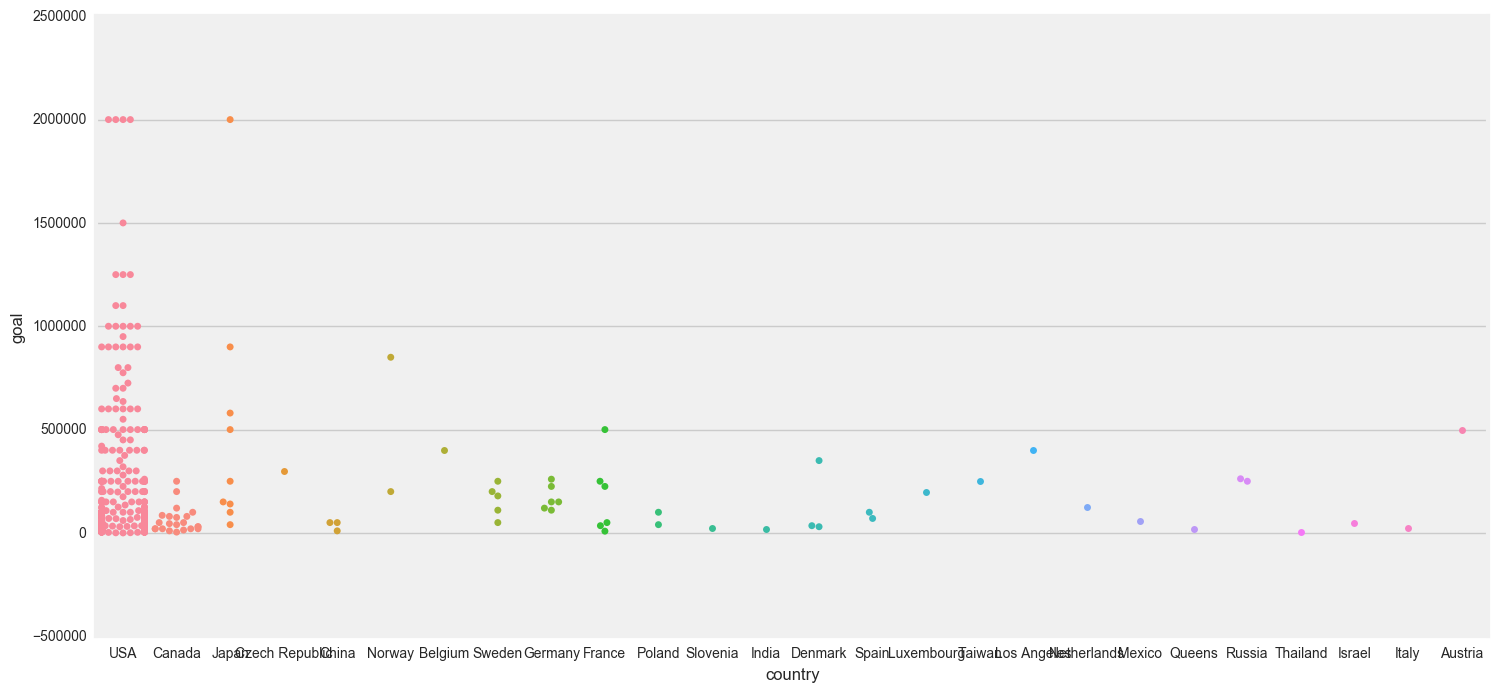

In [145]:
plt.subplots(figsize=(16,8));
sns.swarmplot(x="country", y="goal", data=test);

In [206]:
df2["blurb"] = df2["blurb"].map(lambda x: x.replace("\n", "").replace(",", ""))
df2["title"] = df2["title"].map(lambda x: x.replace("\n", "").replace(",", "").replace("|", "-"))
df2.to_csv("addedstuff.csv")

In [171]:
for i in df2["title"]:
    if "BAU" in i:
        print i

The World's Best TRAVEL JACKET with 15 Features -- BAUBAX
BAUHAUS:  Titanium Keychain / Key Carabiner


In [173]:
import string

In [174]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [208]:
df2[df2.creator == "digitalmanga"]

,amt.pledged,blurb,category,currency,goal,location,num.backers,num.backers.tier,pledge.tier,title,url,creator,loc1,loc2,is_state,loc_USA,country,country_num
3600,105734.0,Support the publication of 'Vanilla Essence' by Yamatogawa! A heartwarming erotic manga anthology.,Graphic Novels,usd,27000.0,"Gardena, CA",1211,"[17, 203, 65, 2, 319, 152, 121, 35, 9, 8, 40, 157, 55, 7, 9, 2, 4, 3, 1]","[1.0, 10.0, 17.0, 20.0, 25.0, 32.0, 55.0, 60.0, 92.0, 92.0, 125.0, 125.0, 300.0, 350.0, 350.0, 450.0, 550.0, 850.0, 1000.0]",Vanilla Essence - a heartwarming erotic manga anthology,/projects/digitalmanga/vanilla-essence-a-heartwarming-erotic-manga-anthol,digitalmanga,Gardena,CA,1,1,USA,57
